# Evaluation Metrics

Implementation of evaluation metrics using surprise library.

In [20]:
predicted_ratings_closed = [2, 4, 3, 1, 3, 4, 3]
predicted_ratings_worst = [4, 1, 1, 4, 1, 1, 1]
actual_ratings = [2, 4, 3, 1, 3, 4, 4]

In [5]:
from surprise import accuracy
import numpy as np

# Accuracy

## MAE (Mean Absolute Error)
Mean Absolute Error (MAE) is a metric used to evaluate the accuracy of a predictive model by measuring the average absolute difference between the predicted values and the actual (ground truth) values. 
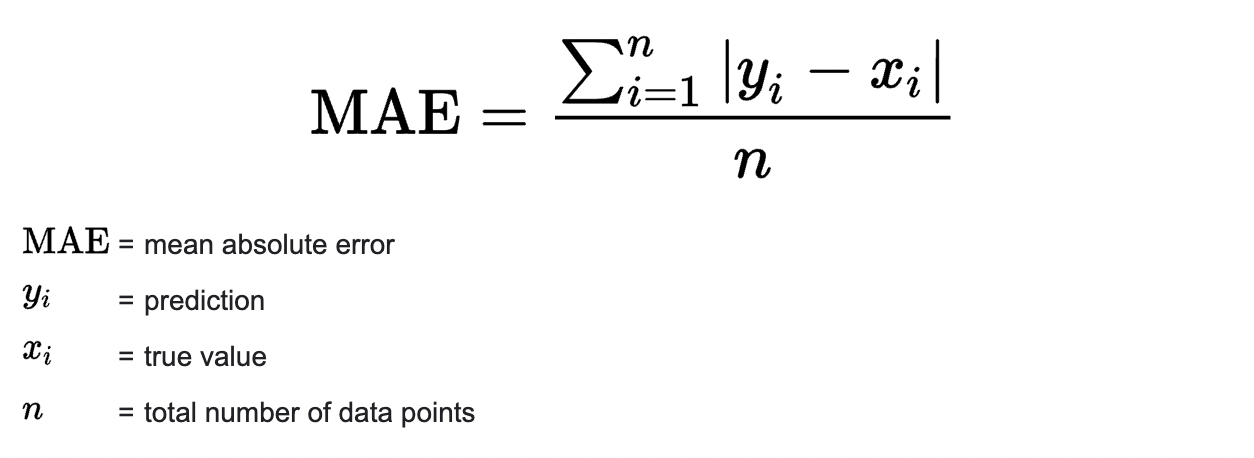

In [17]:
def MSE(predictions, actuals):
    return np.mean(np.abs(np.array(predictions) - np.array(actuals)))

In [22]:
mae_closed = MSE(predicted_ratings_worst, actual_ratings)
mae_worst = MSE(predicted_ratings_closed, actual_ratings)
mae_closed, mae_worst

(2.5714285714285716, 0.14285714285714285)

In [28]:
# Demo using Surprise library

# Create a list of tuples in the format (user_id, item_id, actual_rating, predicted_rating, _)
test_data = [(i, j, actual_ratings[idx], predicted_ratings_worst[idx], 0)
             for idx, (i, j) in enumerate(zip(range(len(predicted_ratings_worst)), range(len(actual_ratings))))]

# Calculate MAE using the Surprise accuracy module
mae = accuracy.mae(test_data)

MAE:  2.5714


## RMS (Root Mean Square Error)
The RMSE is calculated by taking the square root of the mean of the squared differences between predicted and actual values. 

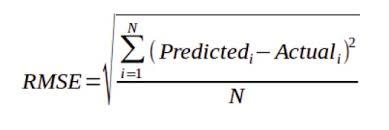

Characterstics:
- Lower RMSE values indicate better predictive accuracy, as smaller differences between predicted and actual values result in lower RMSE values. Conversely, higher RMSE values suggest larger discrepancies between predictions and actual values.

In [23]:
def RMSE(predictions, actuals):
    return np.sqrt(np.mean(np.square(np.array(predictions) - np.array(actuals))))

In [25]:
rmse_worst = RMSE(predicted_ratings_worst, actual_ratings)
rmse_closed = RMSE(predicted_ratings_closed, actual_ratings)
rmse_worst, rmse_closed

(2.6186146828319083, 0.3779644730092272)

# Top N-recommenders

When evaluating top-N recommenders, you're assessing the performance of recommendation algorithms in terms of how well they predict and rank items that a user is likely to be interested in. 

## Hit rate

The "hit rate" is a metric used to evaluate the performance of a recommendation system by measuring the percentage of users for whom the system provides at least one relevant recommendation in the top-N list. It focuses on whether the system is able to successfully identify items that are of interest to users.

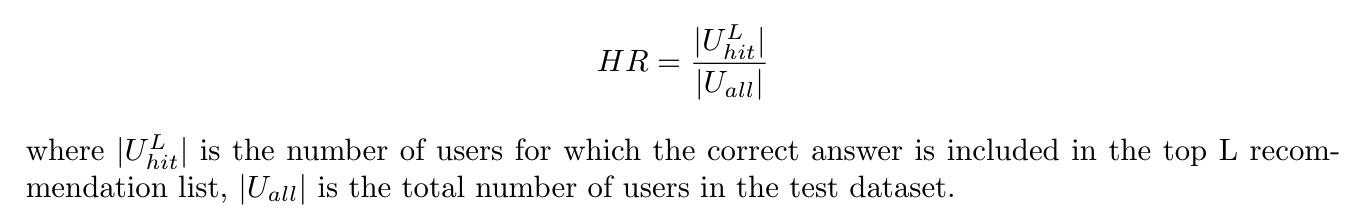

**key points about the hit rate:**
- The hit rate considers whether the top-N recommended items include at least one item that the user has interacted with or found relevant in the past.
- A higher hit rate indicates that the recommendation system is successful in suggesting items that match users' interests.
- The hit rate does not consider the quality of the recommendations beyond identifying if at least one relevant item was suggested.
- The hit rate metric is relatively simple and doesn't account for the order of the relevant item in the recommendation list.

In [45]:
def is_hit(recommended_items, relevant_items):
    matches = set(recommended_items).intersection(set(relevant_items))
    return int(any(matches))

In [39]:
recommended_items = [1, 3, 5]
relevant_items = {3, 7, 9}

print(" Hit : ", is_hit(recommended_items, relevant_items))

 Hit :  1


Here we have count hit for a single user, to calculate hit rate we have to do this for multiple users.

In [42]:
def hit_rate(users, recom, rele):
    hit_count = 0
    for user in users:
        hit = is_hit(recommended_items_per_user[user], relevant_items_per_user[user])
        hit_count += hit
    return hit_count / len(users)

In [44]:
users = ["user1", "user2", "user3"]
recommended_items_per_user = {
    "user1": [1, 3, 5], #hit
    "user2": [2, 4, 6], #hit
    "user3": [7, 6, 9] #no hit
}
relevant_items_per_user = {
    "user1": {3, 7, 9},
    "user2": {2, 5, 6},
    "user3": {1, 4, 8}
}

hit_rate(users, recommended_items_per_user, relevant_items_per_user)

0.6666666666666666

## Average Reciprocal Hit Rate (ARHR)
- This metric is also similar to the hit rate. But for each user for which we have a hit, we sum the reciprocal of the rank of the matched item in the top-n list and the left out predictions in the top n list for each user and divide by the number of users.

- The Average Reciprocal Hit Rate (ARHR) is a metric used to evaluate the performance of a recommendation system by considering the position of the first relevant item in the recommended list. It takes into account not only whether a relevant item is recommended but also the ranking position of that item. The reciprocal of the rank of the first relevant item is calculated, and the average of these reciprocals across all users is taken to obtain the ARHR.
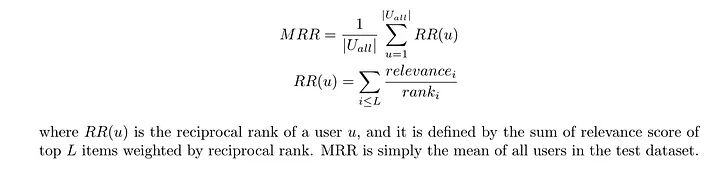

Note that there are different variations or simplifications for calculating RR(u). For implicit dataset, the relevance score is either 0 or 1, for items not bought or bought (not clicked or clicked, etc.).

Another simplification is only to look at one top relevant item in the recommendation list, instead of summing up for all.

In [64]:
def get_reciprocal_rank(recommendations, relevants):
    for rank, item in enumerate(recommendations, 1):
        if item in relevants:
            return 1./rank
    return 0.

In [65]:
recommended_items = [1, 3, 5]
relevant_items = {3, 7, 9}

get_reciprocal_rank(recommended_items, relevant_items)

0.5

In [62]:
def arhr(users, recommendations, relevants):
    reciprocal_hits = []
    for user in users:
        reciprocal_hit = get_reciprocal_rank(recommended_items_per_user[user], relevant_items_per_user[user])
        print(f"RH of user {user}: {reciprocal_hit}")
        reciprocal_hits.append(reciprocal_hit)
    return np.sum(np.array(reciprocal_hits)) / len(users)

In [63]:
print("ARHR: ", arhr(users, recommended_items_per_user, relevant_items_per_user))

RH of user user1: 0.5
RH of user user2: 1.0
RH of user user3: 0.0
ARHR:  0.5


# Cumulative Hit rate